In [10]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree


# Decision tree

In [11]:
from util.functions import impute_and_train

model_constructor = DecisionTreeClassifier
df_numeric = pd.read_csv('processed/df_numeric.csv')

results = impute_and_train(df_numeric, model_constructor)


learning with mean imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with median imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with mode imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with KNN imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with MICE imputed data
Cross-validation iteration 1/5
Cross-validation iteration 2/5
Cross-validation iteration 3/5
Cross-validation iteration 4/5
Cross-validation iteration 5/5
learning with iterative imputed data
Cross-validation iteration 

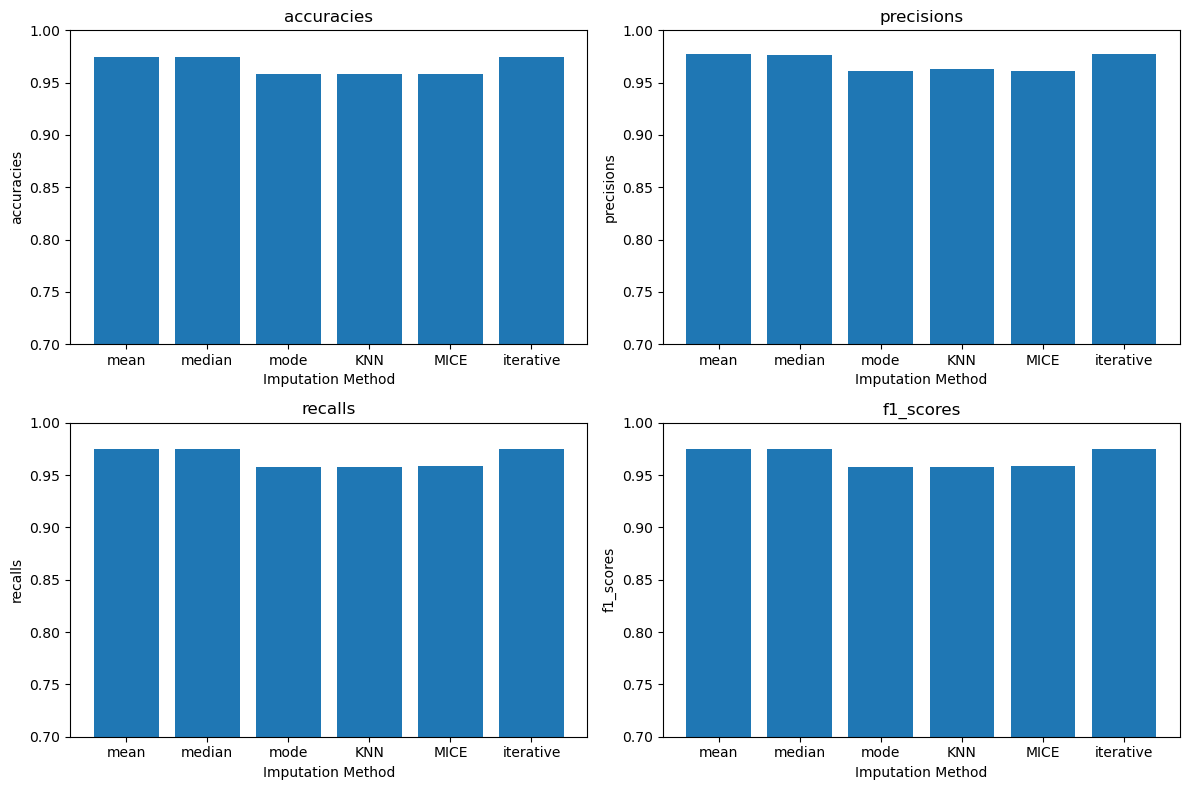

In [12]:
from util.functions import plot_metrics
metrics = results['metrics']
plot_metrics(results['metrics'])

    

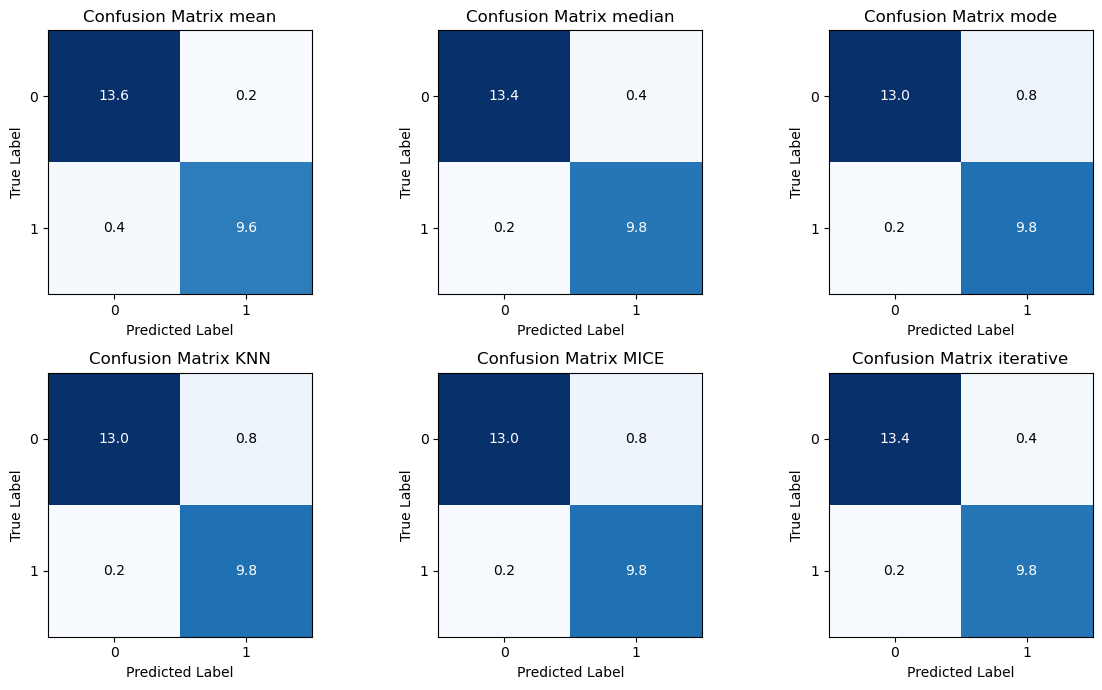

In [13]:
from util.functions import plot_mean_confusion_matrices
confusion_matrices = results['confusion_matrices']
plot_mean_confusion_matrices(confusion_matrices)

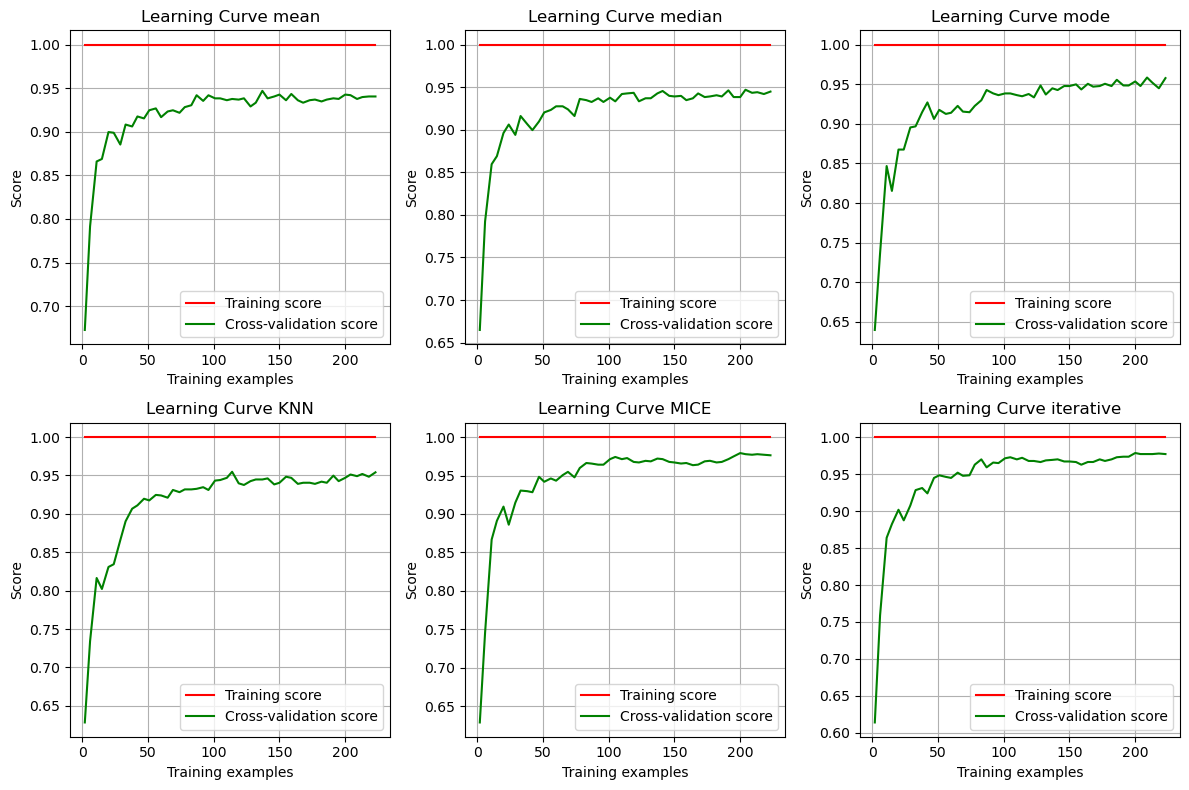

In [14]:
from util.functions import plot_learning_curves
plot_learning_curves(results['learning_curves'])

feature importances for iteration 0


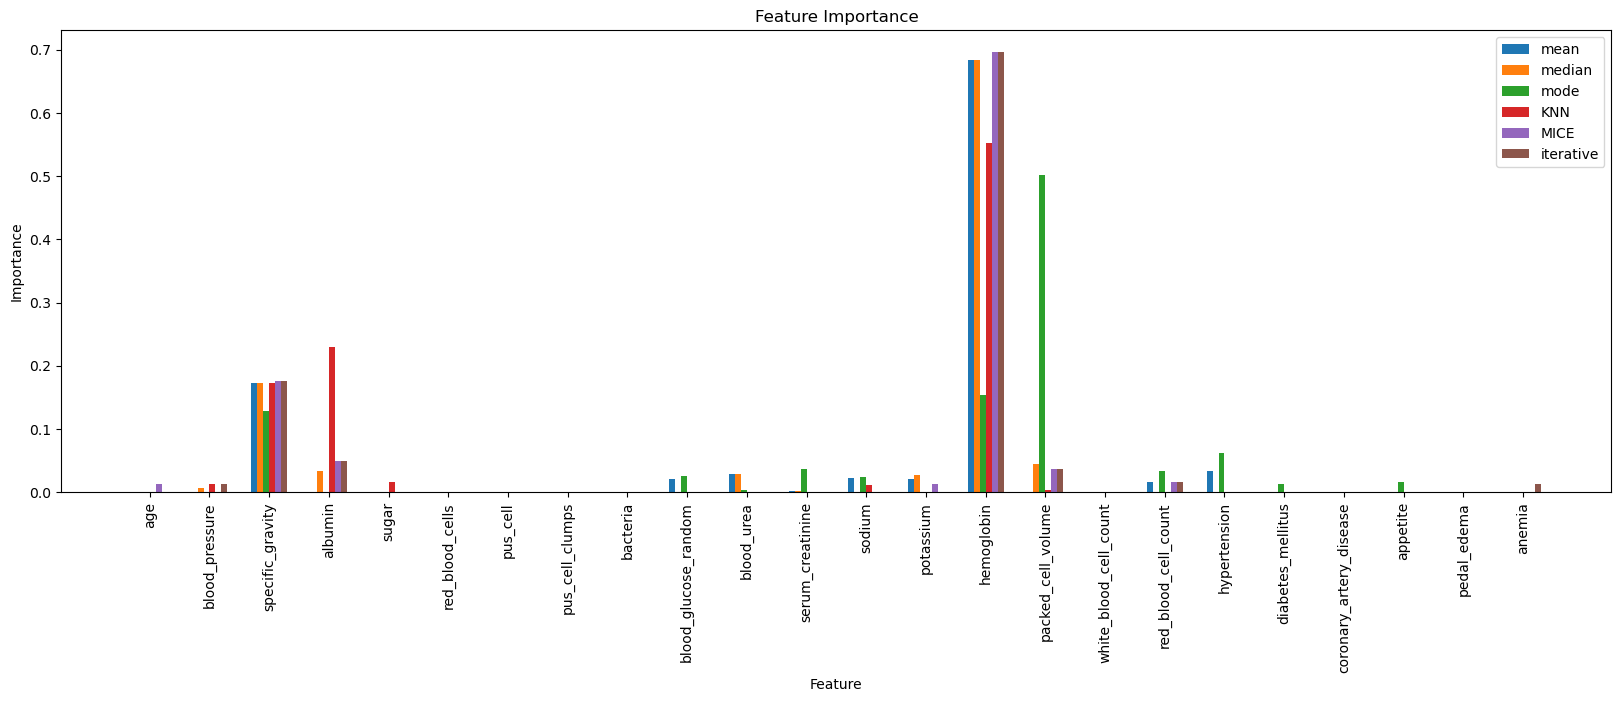

feature importances for iteration 1


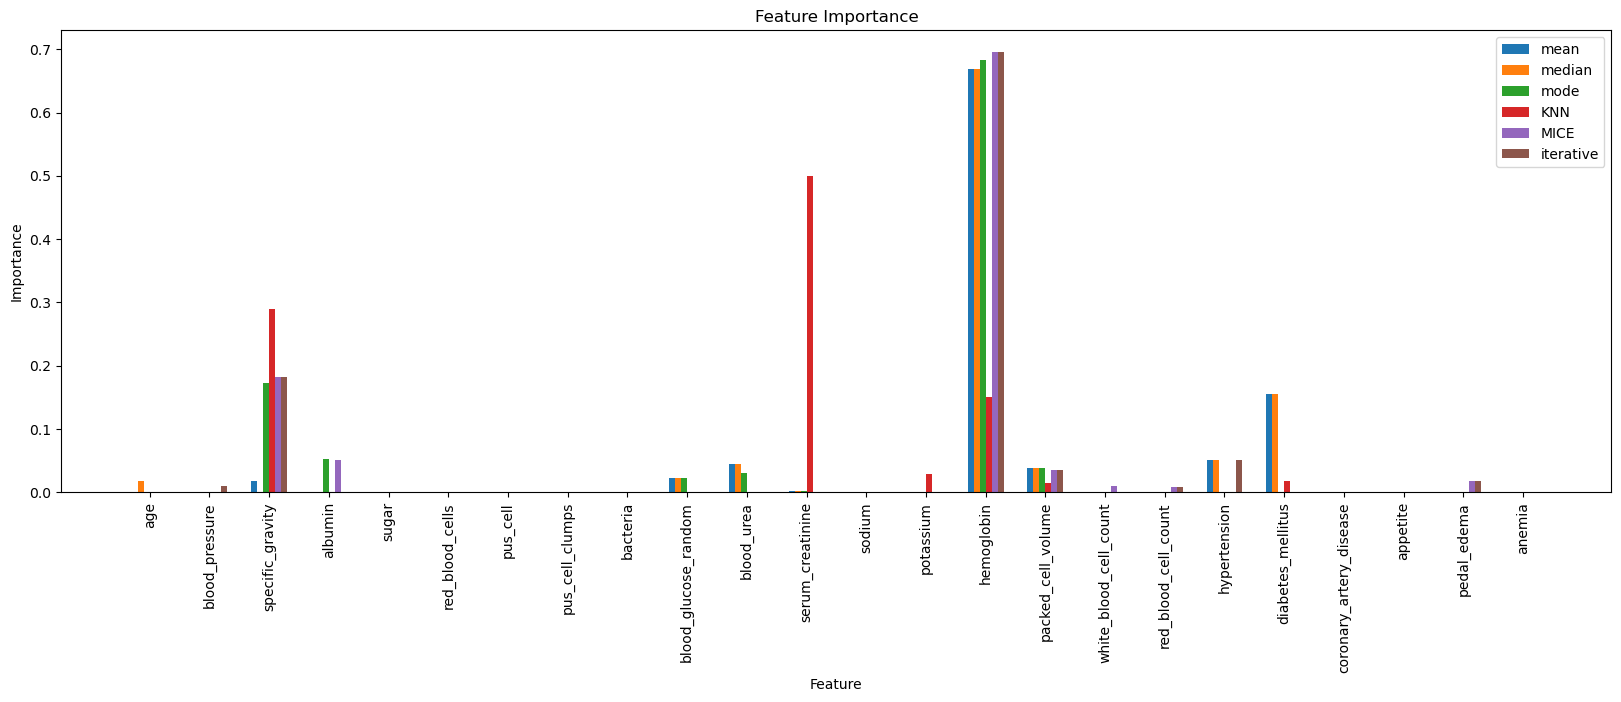

feature importances for iteration 2


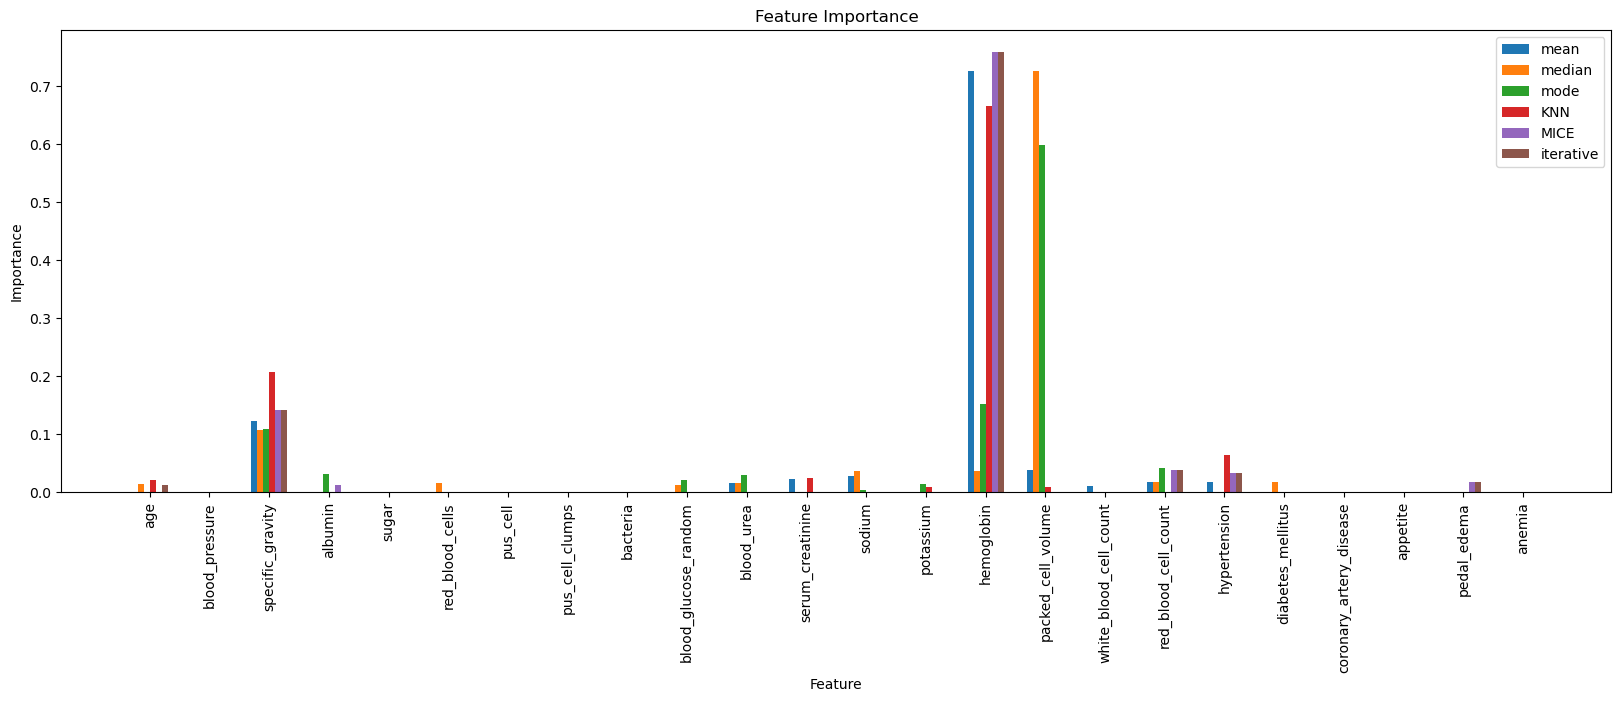

feature importances for iteration 3


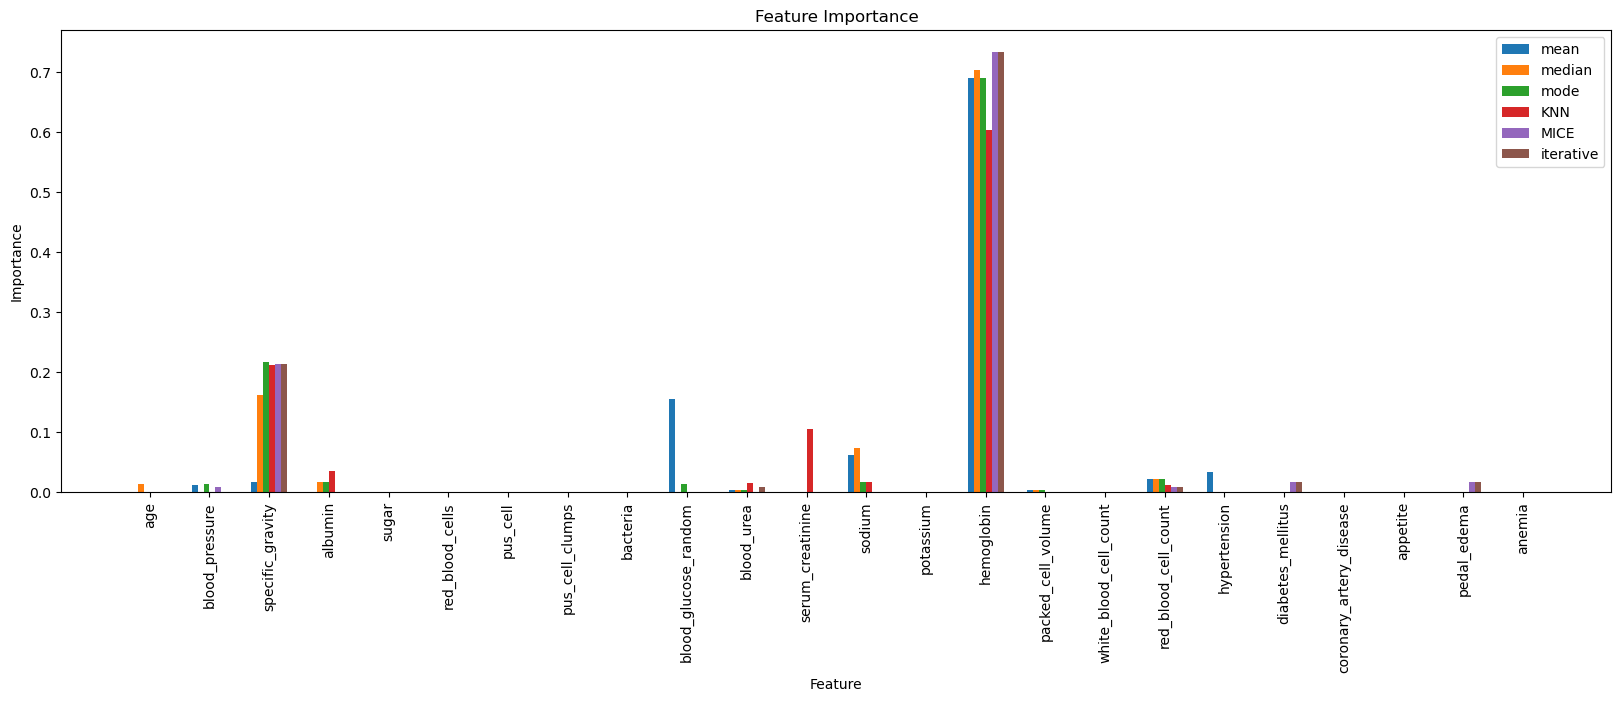

feature importances for iteration 4


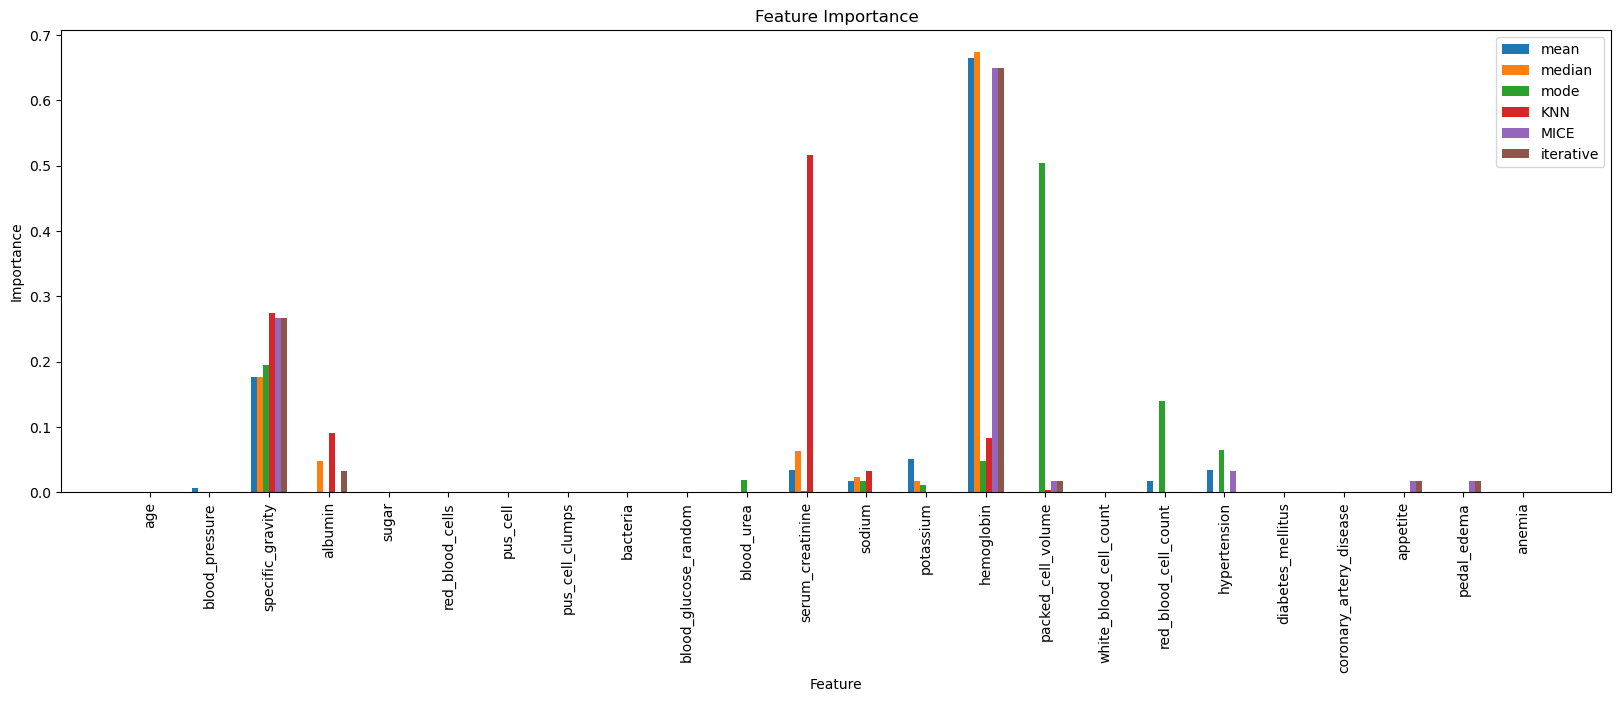

In [15]:
from util.functions import plot_feature_importances
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
all_feature_importances = {}
for i in range(5):
    for (name, models) in results['models'].items():
        feature_importances[name] = pd.DataFrame(models[i].feature_importances_, index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

    print('feature importances for iteration', i)
    plot_feature_importances(feature_importances)


#### Mean feature importances across models

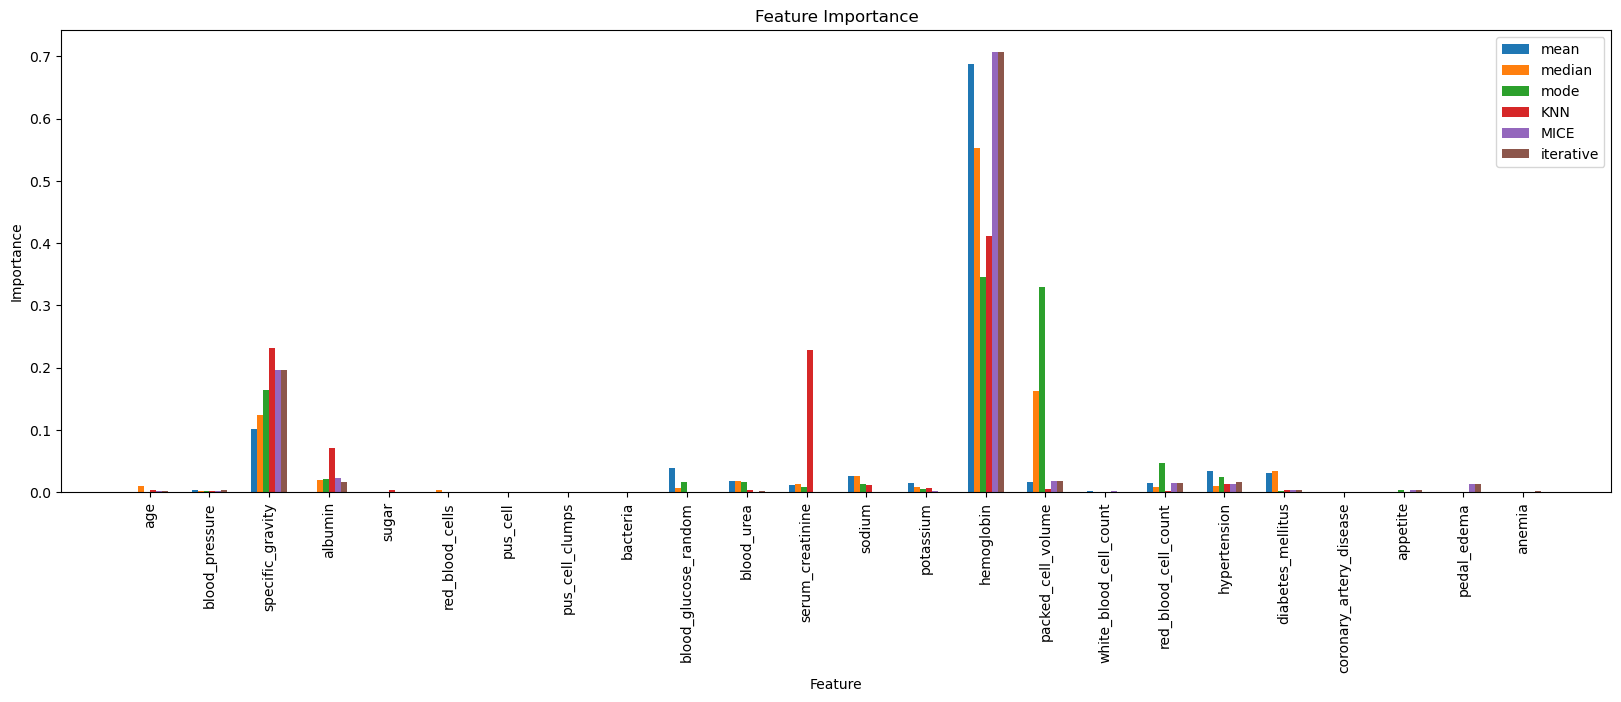

In [16]:
# plot all feature importances as subplots
import pandas as pd
import numpy as np
df_numeric = pd.read_csv('processed/df_numeric.csv')
feature_importances = {}
all_fi = []
for (name, models) in results['models'].items():
    fi = []
    for i, model in enumerate(models):
        fi.append(model.feature_importances_)
        all_fi.append(model.feature_importances_)
    feature_importances[name] = pd.DataFrame(np.mean(fi, axis=0), index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])

mean = np.mean(all_fi, axis=0)
norm = mean / np.sum(mean)
all_fi_df = pd.DataFrame(norm, index=df_numeric.drop(columns=['class']).columns, columns=['Importance'])
all_fi_df.to_csv('results/feature_importances_decision_tree.csv', index=True)
plot_feature_importances(feature_importances)

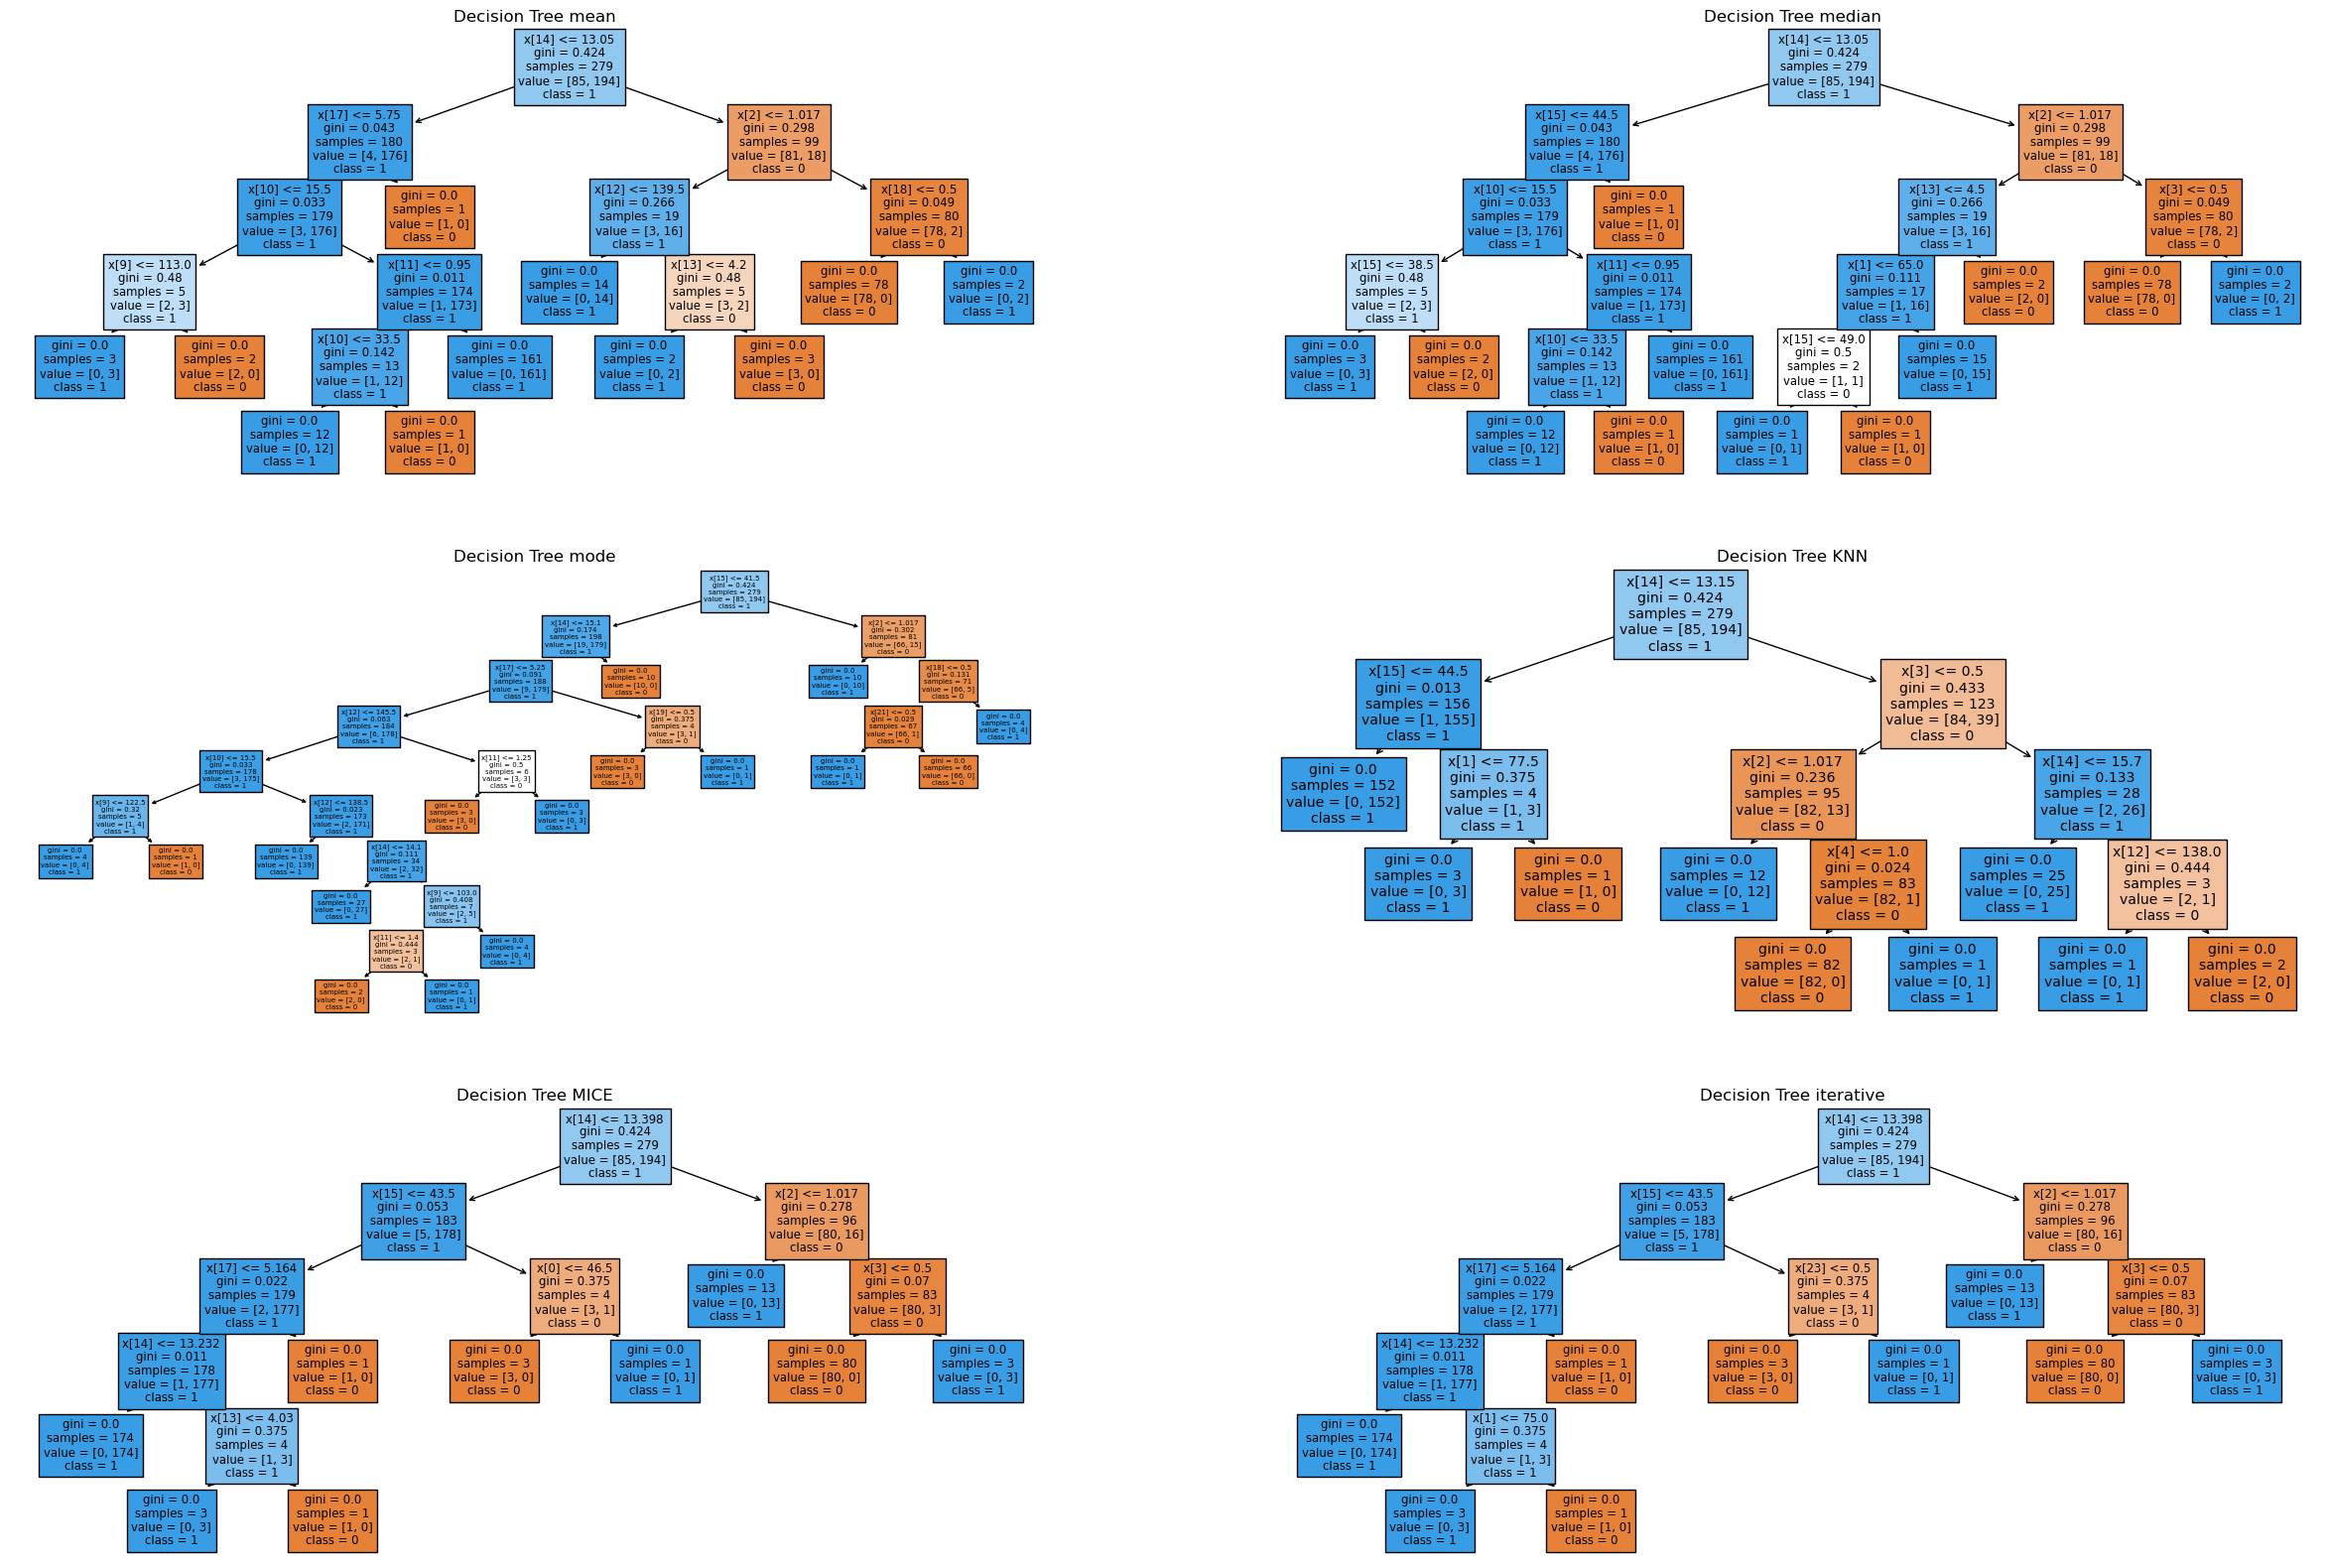

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))

df_numeric = pd.read_csv('processed/df_numeric.csv')
for i, (name, models) in enumerate(results['models'].items()):
    
    model = models[0]
    plot_tree(model, ax=axs.flat[i], class_names=['0', '1'], filled=True)
    axs.flat[i].set_title(f'Decision Tree {name}')